In [1]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 10

In [4]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/多変量解析/academic_ability.csv')
df.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,2,3,4,3,3,4,3,2,3,2
1,5,4,3,3,3,2,4,3,4,5
2,3,3,3,4,3,4,3,4,4,3


In [5]:
df.shape

(40, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   現代文     40 non-null     int64
 1   古文      40 non-null     int64
 2   数学      40 non-null     int64
 3   化学      40 non-null     int64
 4   生物      40 non-null     int64
 5   物理      40 non-null     int64
 6   歴史      40 non-null     int64
 7   世界史     40 non-null     int64
 8   政治経済    40 non-null     int64
 9   英語      40 non-null     int64
dtypes: int64(10)
memory usage: 3.2 KB


In [6]:
df.describe()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.450000,3.400000,3.400000,3.375000,3.350000,3.325000,3.450000,3.475000,3.550000,3.525000
std,1.197219,1.172331,1.215287,1.102154,1.098951,1.288758,0.985797,1.085747,1.060962,1.320208
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.750000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,4.250000,4.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


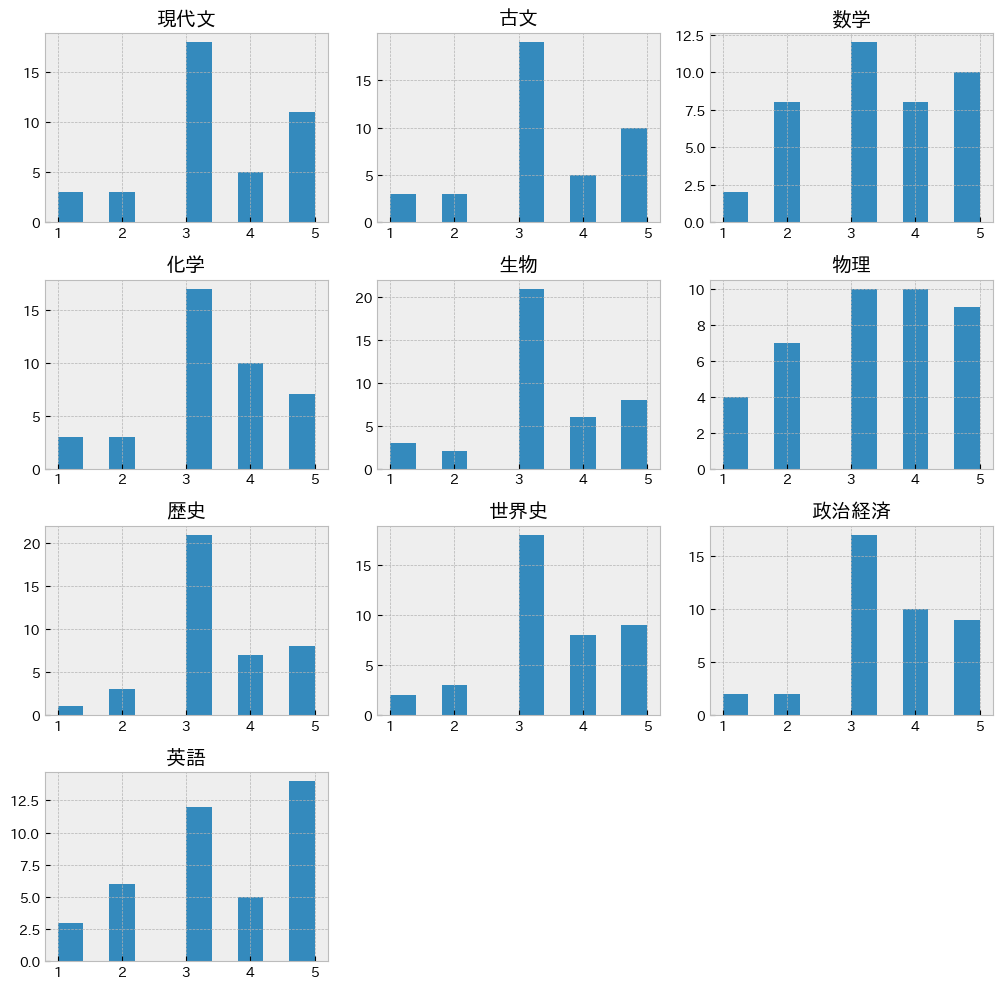

In [10]:
df.hist()
plt.tight_layout()

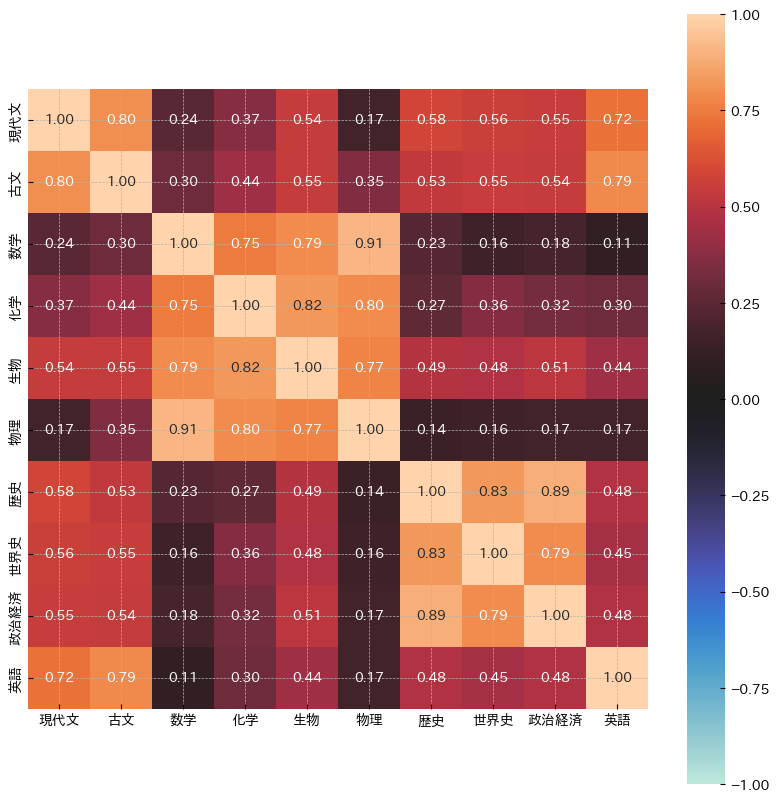

In [15]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [19]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_values, columns = df.columns)
df_scaled.head()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,-1.226569,-0.345547,0.500000,-0.344577,-0.322543,0.530432,-0.462299,-1.375819,-0.525001,-1.169837
1,1.311160,0.518321,-0.333333,-0.344577,-0.322543,-1.041219,0.565032,-0.443060,0.429547,1.131481
2,-0.380659,-0.345547,-0.333333,0.574295,-0.322543,0.530432,-0.462299,0.489698,0.429547,-0.402731
3,1.311160,1.382189,-0.333333,-0.344577,-0.322543,-0.255393,0.565032,0.489698,0.429547,1.131481
4,0.465250,-0.345547,0.500000,1.493168,0.599008,-0.255393,-0.462299,-0.443060,0.429547,-0.402731


In [20]:
# 主成分分析クラスPCAインスタンス化
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [23]:
# 実行
feature = pca.fit_transform(df_scaled)

In [24]:
feature.shape

(40, 10)

In [28]:
pd.DataFrame(feature, columns = [f'PCA{x+1}' for x in range(len(df.columns))])

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,1.582937,1.522060,0.319377,-0.680331,-0.471073,0.310012,-0.562323,0.062166,-0.312301,-0.076888
1,-0.537827,-1.654101,-1.080071,-0.613575,0.194434,-0.690422,-0.164876,0.479087,-0.037316,0.212635
2,0.107779,0.336046,0.608438,0.895810,-0.093421,0.212990,-0.346491,0.051084,0.624242,-0.164918
3,-1.339368,-1.645856,-1.095151,-0.272281,0.063357,0.447164,-0.099699,0.211740,0.128337,-0.032590
4,-0.518339,0.969427,0.078046,0.495261,0.818791,-1.029864,-0.726044,0.225064,-0.002689,0.476964
5,0.564635,-0.418790,0.663458,-0.385418,-0.290117,-0.250100,-0.388987,0.242385,-0.194095,-0.219777
6,-0.460786,0.508158,-0.439562,0.537366,-0.660517,-0.273038,-0.703115,-0.449270,-0.107411,-0.225494
7,-3.835256,0.121999,-0.216560,0.694654,0.035814,0.034170,-0.277471,-0.366041,0.413349,-0.233640
8,4.390589,-1.246005,0.686091,0.758606,0.564110,0.415885,-0.737896,-0.122621,0.277852,0.174179
9,-1.065841,2.118970,-0.644981,-0.158837,-0.839369,-0.701330,0.926465,-0.497933,0.068095,0.088533


寄与率・累積寄与率

In [31]:
variance_ratio = pca.explained_variance_ratio_

In [33]:
pd.DataFrame(variance_ratio, index = [f'PC{x+1}' for x in range(len(variance_ratio))], columns = ['寄与率'])

,寄与率
PC1,0.541745
PC2,0.233236
PC3,0.102936
PC4,0.030539
PC5,0.029439
PC6,0.023589
PC7,0.016467
PC8,0.010968
PC9,0.007184
PC10,0.003898


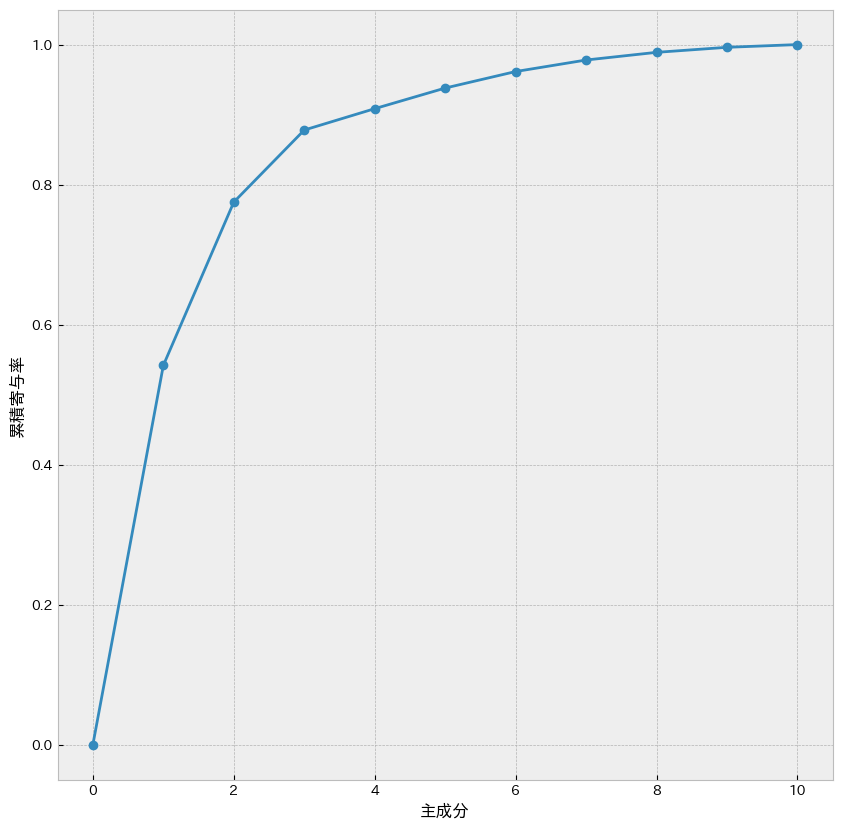

In [35]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(variance_ratio,)), '-o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.show()

主成分負荷量
- 固有値：各種成分の分散の大きさ
- 固有ベクトル：分散が最大になる方向

In [34]:
# 固有ベクトル
eigenvector = pca.components_

In [36]:
pd.DataFrame(eigenvector,
             index=[f'PC{x+1}' for x in range(len(eigenvector))],
             columns=df_scaled.columns)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
PC1,-0.330471,-0.345861,-0.264372,-0.312252,-0.371225,-0.261427,-0.323972,-0.318760,-0.324065,-0.293324
PC2,-0.215454,-0.147589,0.472686,0.354349,0.251609,0.487920,-0.285686,-0.265534,-0.272543,-0.234572
PC3,-0.352338,-0.418284,0.084606,0.002393,0.044721,0.009705,0.392747,0.363047,0.384869,-0.507406
PC4,-0.256860,-0.011623,-0.459995,0.638958,-0.038767,-0.059016,-0.333653,0.426382,-0.060221,0.110849
PC5,0.678160,-0.079317,0.037859,0.170128,0.095616,-0.298730,-0.100190,0.184604,-0.262602,-0.540345
PC6,-0.142910,0.578022,0.113232,-0.239358,-0.388621,0.305380,-0.043586,0.426987,-0.240359,-0.298462
PC7,-0.025355,-0.408031,0.181340,-0.216001,0.116020,-0.002665,0.171988,0.450016,-0.588067,0.402421
PC8,0.119172,-0.123452,0.172296,0.451003,-0.700474,0.017178,0.433175,-0.186758,-0.117271,0.101179
PC9,0.352286,-0.389237,0.057152,-0.171071,-0.340150,0.399963,-0.461027,0.201125,0.379757,0.137742
PC10,-0.187015,0.099325,0.638617,0.055701,-0.124042,-0.589273,-0.325801,0.141556,0.196033,0.130320


In [40]:
# 固有値(平方根)
np.sqrt(pca.explained_variance_).reshape(10, 1).shape

(10, 1)

In [46]:
# 主成分負荷量
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(factor_loading,
            index=[f'PC{x+1}' for x in range(len(factor_loading))],
             columns=df_scaled.columns)

df_factor_loading.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
PC1,-0.778985,-0.815262,-0.623175,-0.736037,-0.875048,-0.616234,-0.763665,-0.751380,-0.763885,-0.691421
PC2,-0.333235,-0.228270,0.731086,0.548058,0.389155,0.754649,-0.441860,-0.410692,-0.421533,-0.362804
PC3,-0.362027,-0.429786,0.086932,0.002459,0.045950,0.009972,0.403547,0.373031,0.395452,-0.521359


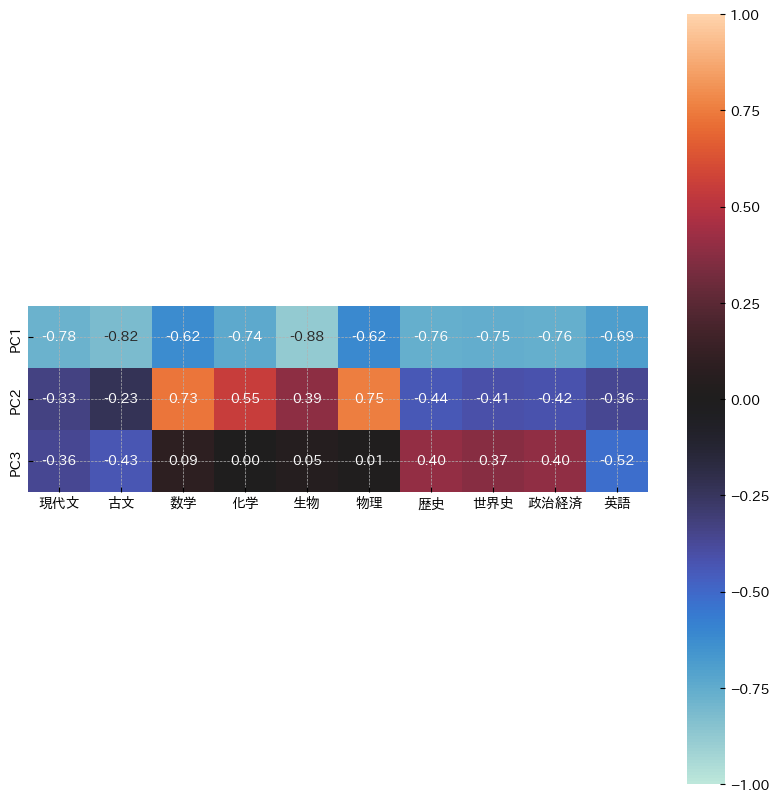

In [47]:
sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

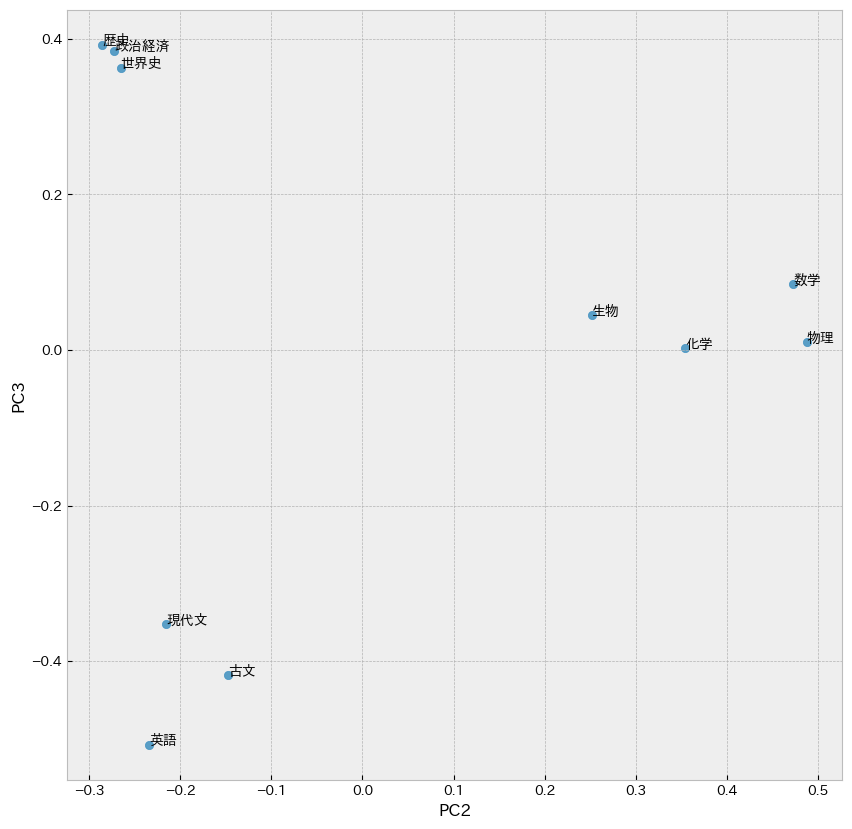

In [48]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
for x, y, name in zip(pca.components_[1], pca.components_[2], df.columns):
    plt.text(x, y, name)

plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)

plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

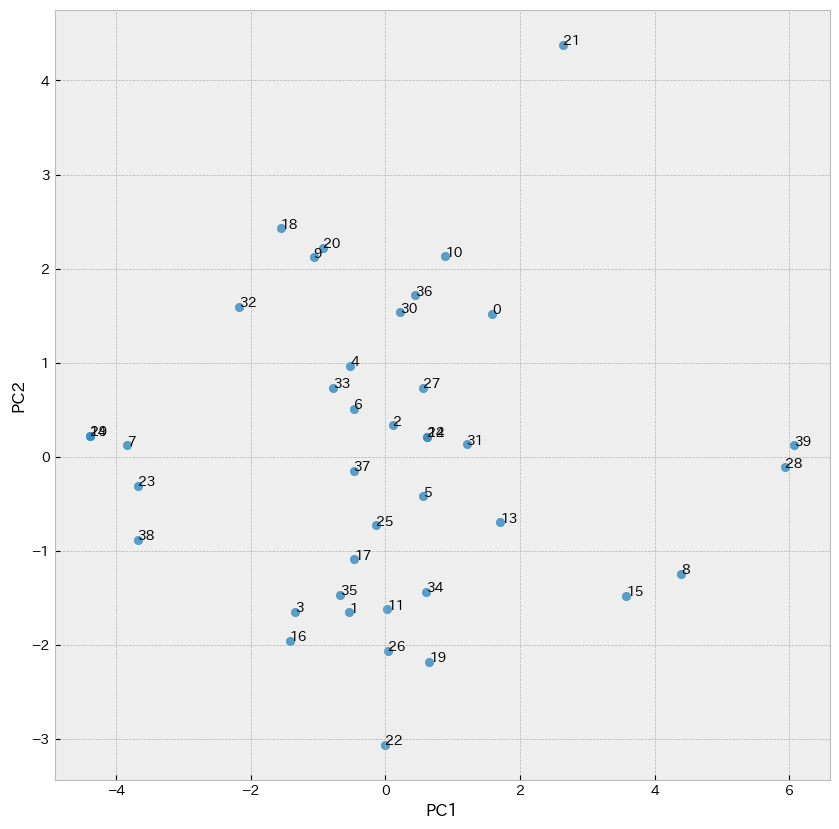

In [49]:
# 第一主成分と第二主成分における主成分得点をプロットする
for x, y, name in zip(feature[:,0], feature[:, 1], list(range(len(feature)))):
    plt.text(x, y, name)

# x, y 軸の名前の追加
plt.xlabel('PC1')
plt.ylabel('PC2')

# 散布図の可視化
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, cmap='Blues');

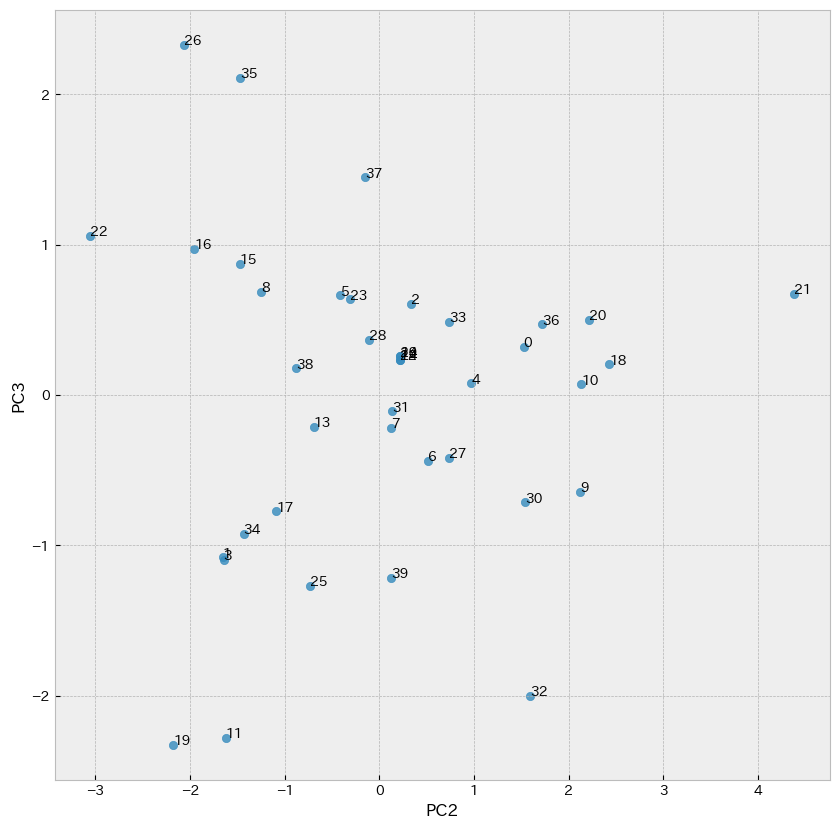

In [50]:
# 第二主成分と第三主成分における主成分得点をプロットする
for x, y, name in zip(feature[:,1], feature[:, 2], list(range(len(feature)))):
    plt.text(x, y, name)

# x, y 軸の名前の追加
plt.xlabel('PC2')
plt.ylabel('PC3')

# 散布図の可視化
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8, cmap='Blues');
